# Problema de classificação de partículas exóticas (SUSY)

O dataset contém 5 milhões de amostras de simulações. A classe é indicada na primeira coluna (0 ou 1); as 8 colunas seguintes são features obtidas originalmente das simulações, e as 10 seguintes são features de alto nível, computadas a partir das anteriores.

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

names = ["class", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", 
         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel",
         "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"
        ]
data = pd.read_csv("SUSY.csv", names=names, nrows=10000)
print(data.shape)

array = data.values
X = array[:, 1:]
Y = array[:, 0]

(10000, 19)


Fonte: https://machinelearningmastery.com/an-introduction-to-feature-selection/

### Matriz de correlação

[Documentação](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr)

Como indicado pelo nome, comporta a correlação entre os dados. No geral, é preciso indicar um método de cálculo do coeficiente( pearson - Coeficiente de correlação padrão, kendall, spearman), em caso de omissão, como abaixo utiliza-se o método padrão.

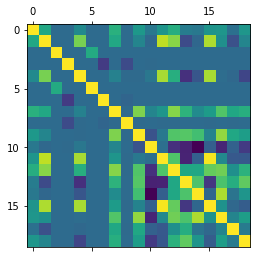

In [19]:
plt.matshow(data.corr())

## sklearn.feature_selection.SelectKBest

[Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

Destina-se à seleção de features de acordo às maiores k pontuações. Utiliza além disso uma função para pontuação que para problemas de classificação é a f_classif. O retorno é um par de matrizes com scores e valores ou único array de scores.



In [152]:
from sklearn.feature_selection import SelectKBest, f_classif

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# summarize selected features
print(features[0:5,:])

[1.853e+03 7.318e-01 9.711e-01 4.111e+02 1.367e-01 6.056e-02 2.239e+03
 4.234e+00 8.555e+02 6.235e+01 7.668e+02 2.194e+03 1.249e+02 6.424e+01
 7.025e+02 8.588e+02 6.756e+00 7.775e+02]
[[0.973 0.568 0.89  0.994]
 [1.668 3.475 0.568 0.205]
 [0.445 1.22  0.942 1.562]
 [0.381 2.033 1.015 1.715]
 [1.31  1.088 0.968 0.043]]


### Recursive Feature Elimination

A Recursive Feature Elimination (ou RFE) consiste na remoção de maneira recursiva de atributos e construção de modelo com os que permanecem. De maniera geral, utiliza a precisão de um modelo para identificar quais atributos são mais relevantes para a predição.

#### sklearn.feature_selection.RFE

[Documentação](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE)

In [148]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False False  True False False False False False
 False False  True False False False]
Feature Ranking: [ 1 16 15  6 13 14  1 12  9  8 10  3  2 11  1  7  4  5]


### Principal Component Analysis

Consiste em um procedimento estático que utiliza transformação ortogonal de algébra linear, que converte um conjunto de observações de variáveis que estejam correlacionadas em valores linearmente não correlacionados, chamados de componentes principais. É aplicado para compressão e simplificação de dados, buscando facilitar a a visualização.Entretanto, não é recomendado em casos de dados ruidosos (com falta de registro, etc). Conforme exemplo abaixo, observa-se que os três componentes principais possuem pouca semelhança com os originais.


In [149]:
# Feature Extraction with PCA
import numpy
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.21387623 0.14724111 0.12447848]
[[ 2.26460032e-01 -1.15283788e-02 -1.25404520e-03  1.16756875e-01
   1.44353846e-02  2.77363229e-03  4.44841446e-01  3.80707533e-03
   4.75274631e-01 -2.15403163e-01  1.75895845e-01  3.36484206e-01
   1.65976887e-01  3.44711211e-01  2.03284781e-01  3.50284058e-01
   8.49859170e-02  5.26202293e-02]
 [ 3.36050072e-01 -1.15689931e-03 -1.81344789e-03  3.36856995e-01
   8.48468631e-03 -1.38600743e-03  2.15798213e-01 -2.92793122e-03
  -8.81029798e-02  5.24511890e-01  3.50327632e-01  9.99204979e-02
  -2.09037436e-01 -3.89981256e-01  3.14388720e-01 -1.21561242e-01
  -2.71474917e-02 -3.48841354e-02]
 [-1.30719003e-03 -7.00213814e-01 -8.05963274e-02  4.64313739e-04
  -7.02992938e-01  6.98820708e-02  6.71838751e-03  6.32527873e-02
  -2.63043337e-03  7.28472023e-03  7.65209391e-04  5.54086100e-04
   1.72030515e-03 -5.76377168e-04  8.31231631e-04  2.83888010e-03
  -2.27799334e-04  1.15063845e-03]]


### Feature Importance

Além dos métodos apresentados anteriormente, é possível utilizar árvore de decisão (Random Forest e Extra Trees) para estimar a importância das features. Abaixo tem um exemplo de aplicação de ExtraTrees, em que se constrói um modelo  e a partir dele é calculada uma importância para cada feature.


In [29]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.09599041 0.04638616 0.03429688 0.04343944 0.04082472 0.03534582
 0.09807981 0.03475428 0.05594701 0.07197435 0.05524765 0.08067933
 0.04340342 0.0466097  0.05566365 0.0481973  0.04293166 0.07022841]
